In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('C:/Users/Sai Naveen Marni/Desktop/datasets/creditcard.csv')#dataset downloaded from Kaggle.
print('Size of each class\n',df['Class'].value_counts())
#It's an unbalanced data it consists of only 492 rows which belongs to class 1 (anomalies) out of 2,84,807.

Size of each class
 0    284315
1       492
Name: Class, dtype: int64


# Let's see the distribution of each feature in the dataset using histogram

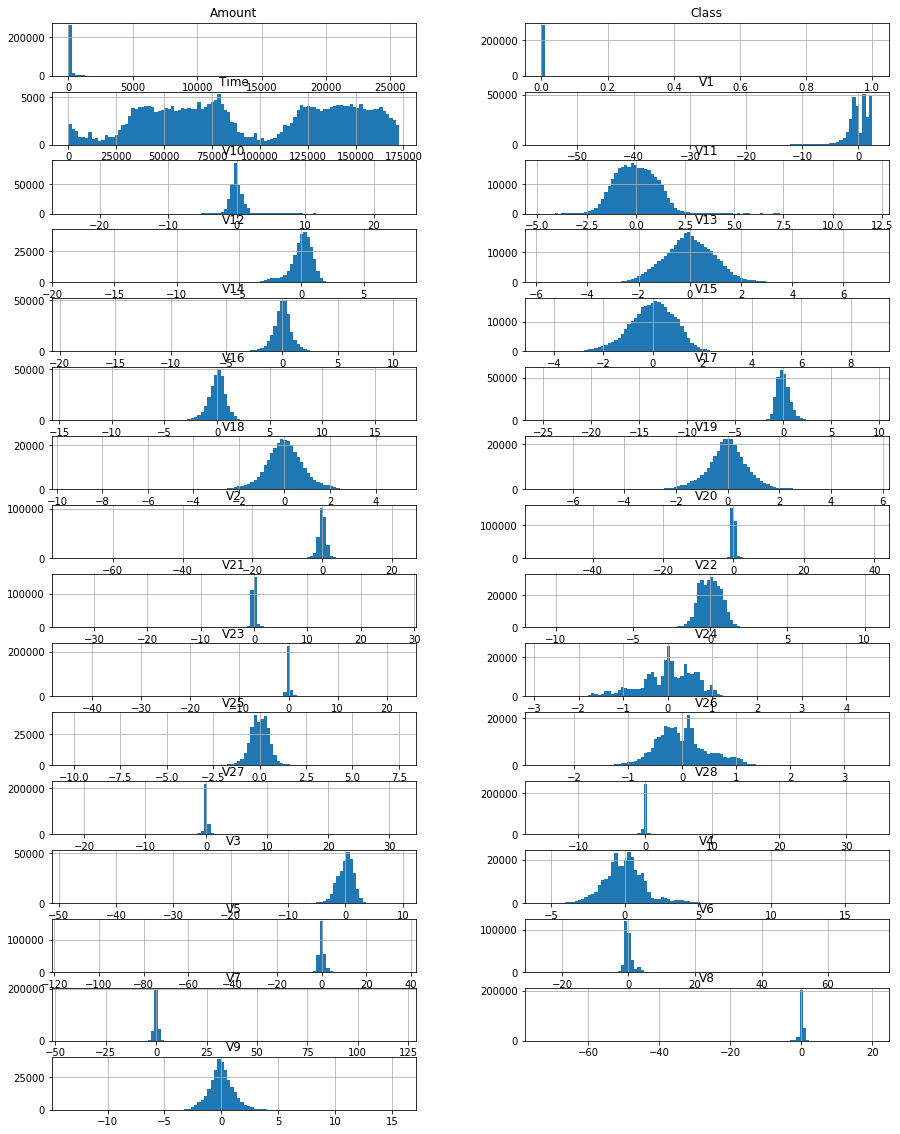

In [158]:
x=df.columns.tolist()
df[x].hist(bins=100,layout=(16,2),figsize=(15,20));

Well,after seeing the histograms of features there are few features which are in normal distribution form.In the orginal Isolation Forest paper the author states that using kurtosis statistical test he could be able to find better features for a dataset which improved the performance of the model.Although the algorithm randomly selects features each time till it reaches a certain height as tree.Let us see the kurtosis  results below.I randomly compared the accuracy of features recommended by kurtosis and other features as expected features recommended by kurtosis performed better.

In [159]:
df.kurtosis()

Time       -1.293530
V1         32.486679
V2         95.773106
V3         26.619551
V4          2.635455
V5        206.904560
V6         42.642494
V7        405.607417
V8        220.586974
V9          3.731311
V10        31.988239
V11         1.633921
V12        20.241870
V13         0.195300
V14        23.879462
V15         0.284769
V16        10.419131
V17        94.799719
V18         2.578341
V19         1.724970
V20       271.016113
V21       207.287040
V22         2.832967
V23       440.088659
V24         0.618871
V25         4.290412
V26         0.919006
V27       244.989241
V28       933.397502
Amount    845.092646
Class     573.887843
dtype: float64

In [ ]:
so, based on the kurtosis test we will select the features which got less score (to be precise close to zero),then we will train the
model.



Wall time: 13.9 s
Confusion matrix with selected features:
For training data
 [[227372     79]
 [    85    309]]
For testing data
 [[56838    26]
 [   27    71]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.73      0.72      0.73        98

    accuracy                           1.00     56962
   macro avg       0.87      0.86      0.86     56962
weighted avg       1.00      1.00      1.00     56962



Text(0.5, 0, 'False Positive Rate')

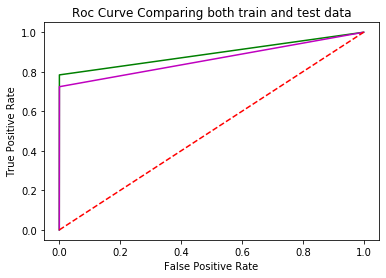

In [6]:
def conv(pred):
     for i in range(len(pred)):
            if(pred[i]==1):
                pred[i]=0
            else:
                pred[i]=1
     return pred
   
    
cdf=pd.DataFrame(df[['Time','V4','V11','V13','V24','V15','V18','V19','V22','V26','V9','V12']])#Selected features dataset
cdf['Class']=df['Class']
ss=StratifiedShuffleSplit(n_splits=2,test_size=0.2,random_state=0)#splitting using StratifiedSplitting for balanced partition of classes.
for tr,te in ss.split(cdf,cdf['Class']):
    train=cdf.loc[tr]
    test=cdf.loc[te]
iso=IsolationForest(contamination=0.0017,max_samples=4096,n_estimators=100,random_state=0)#Object declartion of algorithm.
%time iso.fit(train)
pred=iso.predict(train)
preds=iso.predict(test)
pred=conv(pred)#IForest predicts inliers as 1 and outliers as -1.So,To find accuracy we need to convert them back as 0's and 1's.
preds=conv(preds)
print('Confusion matrix with selected features:')
print('For training data\n',confusion_matrix(train['Class'],pred))
print('For testing data\n',confusion_matrix(test['Class'],preds))
fpr, tpr, thresholds = roc_curve(train['Class'], pred)
print('Classification Report:')
print(classification_report(test['Class'],preds))
f,t,th=roc_curve(test['Class'], preds)
plt.figure()
plt.plot(fpr,tpr,color='g')#Plotting roc curve for training data.(color Indication:Green)
plt.plot(f,t,color='m')#Plotting roc curve for testing data. (color Indication:Magneta)
plt.plot([0,1],[0,1],'r--')
plt.title('Roc Curve Comparing both train and test data')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


# Conclusion


If we see the confusion matrix of testing data out of 98 anomalies the model successfully predicted 71 of them and 21 ones are
predicted as zeroes and 26 zeros are predicted as ones.Detecting Fraudulent is important so we can increase the precision by
decrasing the recall but in this project I just balanced both of them.It is precision-recall tradeoff.